# User's Guide, Chapter 26: Stream Iteration and Filtering

We learned enough about streams in :ref:`Chapter 6 <usersGuide_06_stream2>` to be able to get started, but you've preservered and hopefully are ready to learn more about how to get the most out of getting through a score.  So this chapter will delve deeper into the concept of iteration, that is, going through an object one step at a time, and filtering out elements so only those in classes or areas you want are found.  Let's review and describe the concept of iteration in Python (or most programming languages) for a second.

Suppose you had a list like this:

In [1]:
letterList = ['a', 'b', 'c']

Now you could get your ABCs out of it in this way:

In [2]:
alphabet = ''
alphabet += letterList[0]
alphabet += letterList[1]
alphabet += letterList[2]
alphabet

'abc'

But it's far easier, especially for a big list, to _iterate_ over it using a `for` loop:

In [3]:
alphabet = ''
for letter in letterList:
    alphabet += letter

alphabet

'abc'

We can _iterate_ over a list because lists are _iterable_ (or, conversely, for the tautology department, because we can _iterate_ over a list, we call it _iterable_) and there are some functions and methods that do great things on iterable objects, such as join them:

In [4]:
''.join(letterList)

'abc'

Or give the minimum value from a numeric list:

In [5]:
min([10, 20, 30, -3423, 40])

-3423

Or give the length of an iterable:

In [6]:
len(letterList)

3

In Python, there's a special type of _iterable_ object called a _generator_ which gives out objects as they are needed.  One generator that we have seen already is the `range()` function:

In [7]:
zeroToFifty = range(51)
zeroToFifty

range(0, 51)

We can find the first number in that range that is divisible by 5:

In [8]:
for n in zeroToFifty:
    print(n)
    if n != 0 and n % 5 == 0:
        break

0
1
2
3
4
5


At this point we've stopped going through the `range` object and no more numbers are ever made or stored in memory -- this point doesn't matter to much for a set of numbers up to 50, but for numbers up to millions, or, as we will see, a repertory of scores of hundreds of thousands of notes, saving a few seconds here and there really adds up.

Streams, as we have seen, are iterable:

In [9]:
s = stream.Part(id='restyStream')
s.append(note.Note('C#'))
s.append(note.Rest(quarterLength=2.0))
s.append(note.Note('D', quarterLength=1.5))
s.append(note.Rest(quarterLength=1.0))

for thing in s:
    print(thing, thing.quarterLength)

<music21.note.Note C#> 1.0
<music21.note.Rest half> 2.0
<music21.note.Note D> 1.5
<music21.note.Rest quarter> 1.0


When you iterate over a Stream, it is actually creating a lightweight object called a `StreamIterator` to help make things easier.  We can create one directly by calling `.iter()` on any stream:

In [10]:
sIter = s.iter()
sIter

<music21.stream.iterator.StreamIterator for Part:restyStream @:0>

This information tells us that `sIter` is an iterator going over the `Part` object with id `restyStream` and it is currently ready to give out the first object, number 0.  We can get the next thing in the Stream by calling `next()` on the Stream.

In [11]:
next(sIter)

<music21.note.Note C#>

In [12]:
next(sIter)

<music21.note.Rest half>

In [13]:
sIter

<music21.stream.iterator.StreamIterator for Part:restyStream @:2>

But for the most part, you'll want to use the built in way of going through an iterable, that is, with a `for` loop:

In [14]:
for el in sIter:
    print(el, el.quarterLength)

<music21.note.Note C#> 1.0
<music21.note.Rest half> 2.0
<music21.note.Note D> 1.5
<music21.note.Rest quarter> 1.0


## Filtering elements in iteration

So this does exactly what iterating directly on the Stream does -- but it's good to know that a `StreamIterator` is silently being generated so that you can see what else these Iterators do.  Most importantly, a `StreamIterator` can add filters to it.  Let's add a `ClassFilter` from the :ref:`moduleStreamFilters` module:

In [15]:
restFilter = stream.filters.ClassFilter('Rest')
restIterator = sIter.addFilter(restFilter)
for el in restIterator:
    print(el, el.quarterLength)

<music21.note.Rest half> 2.0
<music21.note.Rest quarter> 1.0


Now when we go through sIter, we are only getting those objects that match all of the filters on it.  We can also filter by offset.  Let's create a new iterator and add an :class:`~music21.stream.filters.OffsetFilter` to it.

In [16]:
sIter2 = s.iter()
offsetFilter = stream.filters.OffsetFilter(offsetStart=0.5, offsetEnd=4.0)
offsetIterator = sIter2.addFilter(offsetFilter)
for el in offsetIterator:
    print(el, el.offset)

<music21.note.Rest half> 1.0
<music21.note.Note D> 3.0


Multiple filters can be chained together to get something more powerful:

In [17]:
for el in s.iter().addFilter(restFilter).addFilter(offsetFilter):
    print(el, el.offset)

<music21.note.Rest half> 1.0


Other filters that `music21` has in the :ref:`moduleStreamFilters` include:

* :class:`~music21.stream.filters.IsFilter` which returns elements that are exactly the same as the objects passed in (useful for getting the context of an object in a stream)

* :class:`~music21.stream.filters.IsNotFilter`, even more useful, for getting everything but an object or list of objects

* :class:`~music21.stream.filters.IdFilter` for finding items by Id.

* :class:`~music21.stream.filters.ClassNotFilter` for finding items other than a list of classes.

* and :class:`~music21.stream.filters.GroupFilter` for finding elements which have a particular group name.


### Filter Shortcuts

Filtering elements by offset or by class is so common, that `music21` has some shortcuts for adding filters to it, like this:

In [18]:
sIter4 = s.iter()
restIterator = sIter4.getElementsByClass('Rest')
restOffsetIterator = restIterator.getElementsByOffset(0.5, 4.0)
for el in restOffsetIterator:
    print(el, el.offset)

<music21.note.Rest half> 1.0


Easier still, since each of these methods returns a new filter object, you can chain them right in the for loop:

In [19]:
for el in s.iter().getElementsByClass('Rest').getElementsByOffset(0.5, 4.0):
    print(el, el.offset)

<music21.note.Rest half> 1.0


And you can even skip the `s.iter()` step for getting an iterator for the most common of these filters, and `music21` will recognize what you want to do and create the iterator for you:

In [20]:
for el in s.getElementsByClass('Rest').getElementsByOffset(0.5, 4.0):
    print(el, el.offset)

<music21.note.Rest half> 1.0


The shortcut methods that `music21` exposes on Iterators include:

* :meth:`~music21.stream.iterator.StreamIterator.getElementById` which adds an `IdFilter`
* :meth:`~music21.stream.iterator.StreamIterator.getElementsByClass` which adds a `ClassFilter`
* :meth:`~music21.stream.iterator.StreamIterator.getElementsByGroup` which adds a `GroupFilter`
* :meth:`~music21.stream.iterator.StreamIterator.getElementsByOffset` which adds an `OffsetFilter`

And there are also properties (that is, written without parentheses) which add certain filters:

* :attr:`~music21.stream.iterator.StreamIterator.notes` which filters out everything but `Note` and `Chord` objects
* :attr:`~music21.stream.iterator.StreamIterator.notesAndRests` which filters out everything except `GeneralNote` objects
* :attr:`~music21.stream.iterator.StreamIterator.parts` which returns all the `Part` objects
* :attr:`~music21.stream.iterator.StreamIterator.voices`
* :attr:`~music21.stream.iterator.StreamIterator.voices` which returns all the `Voice` objects
* :attr:`~music21.stream.iterator.StreamIterator.spanners` which returns all the `Spanner` objects

### Custom Filters

Creating your own filter is pretty easy too.  The easiest way is to create a function that takes in an element and returns True or False depending on whether the object matches the filter.

We will create a filter to see if the element has a `.pitch` attribute and then if that pitch attribute has a sharp on it:

In [21]:
def sharpFilter(el):
    if (hasattr(el, 'pitch') 
            and el.pitch.accidental is not None
            and el.pitch.accidental.alter > 0):
        return True
    else:
        return False
    
sharpIterator = s.iter().addFilter(sharpFilter)

for el in sharpIterator:
    print(el)

<music21.note.Note C#>


## Recursive and Offset Iterators

`Music21` comes with two other iterators that let you do powerful operations.  The most commonly used is the :class:`~music21.stream.iterators.RecursiveIterator` which burrows down into nested Streams to get whatever you want.  Let's load in a nested stream:

In [22]:
bach = corpus.parse('bwv66.6')
for thing in bach:
    print(thing)

<music21.stream.Part Soprano>
<music21.stream.Part Alto>
<music21.stream.Part Tenor>
<music21.stream.Part Bass>
<music21.layout.StaffGroup <music21.stream.Part Soprano><music21.stream.Part Alto><music21.stream.Part Tenor><music21.stream.Part Bass>>


Right, we remember that often the actual notes of a piece can be hidden inside Parts, Measures, and Voices.  A recursive iterator gets to them, and they're created by calling `recurse()` on a stream.

In [23]:
recurseIter = bach.recurse()
recurseIter

<music21.stream.iterator.RecursiveIterator for Score:0x7fe516930760 @:0>

Let's add a filter for only E#s to it, and look into it.  Instead of checking to see if each element has a `.name` attribute we'll put a `try...except` clause around it, and if it does not have the `.name` attribute (and thus raises and `AttributeError` we will return False.

In [24]:
def eSharpFilter(el):
    try:
        if el.name == 'E#':
            return True
        else:
            return False
    except AttributeError:
        return False

eSharpIterator = recurseIter.addFilter(eSharpFilter)

for el in eSharpIterator:
    print(el, el.measureNumber)

<music21.note.Note E#> 9
<music21.note.Note E#> 3
<music21.note.Note E#> 7
<music21.note.Note E#> 7
<music21.note.Note E#> 2
<music21.note.Note E#> 6


Note that the measure numbers don't keep increasing.  That's because the recurse iterator finishes one part before returning to the next.  We can use the fancy `.getContextByClass` to figure out what part it is in:

In [32]:
for el in eSharpIterator:
    pId = el.getContextByClass(stream.Part).id
    print(el, el.measureNumber, pId)

<music21.note.Note E#> 9 Soprano
<music21.note.Note E#> 3 Alto
<music21.note.Note E#> 7 Alto
<music21.note.Note E#> 7 Tenor
<music21.note.Note E#> 2 Bass
<music21.note.Note E#> 6 Bass


(as an aside, `.measureNumber` is just a shortcut for `.getContextByClass(stream.Measure).number`, so we are actually looking up two contexts)

If you want to recurse into a stream and get elements of a certain class, you can do `s.recurse().getElementsByClass(chord.Chord)` but there's another simpler way of doing it: `s[chord.Chord]` (with square brackets).  As this example shows:

In [34]:
chopin = corpus.parse('chopin/mazurka06-2')
for ch in chopin.measures(1, 5)[chord.Chord]:
    print(ch)
    # note that each of these is a chord in one voice in
    # one hand of the piano.  To see how to get chords between
    # both hands, see the chordify() chapter.

<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>
<music21.chord.Chord G#2 D#3>


(when Chopin likes a chord, he **really** likes a chord!) 

Another great iterator is the OffsetIterator, which returns lists of elements grouped by offset.  Let's add some more things to our Stream before we see how it works.

In [26]:
s.insert(0, clef.TrebleClef())
s.insert(0, key.KeySignature(3))
s.insert(1, instrument.Trumpet())

# normal iterator
for el in s:
    print(el, el.offset)

<music21.clef.TrebleClef> 0.0
<music21.key.KeySignature of 3 sharps> 0.0
<music21.note.Note C#> 0.0
Trumpet 1.0
<music21.note.Rest half> 1.0
<music21.note.Note D> 3.0
<music21.note.Rest quarter> 4.5


Unlike with the normal `StreamIterator` or the `RecursiveIterator`, there is no method on `Stream` to create an offset iterator, so we will create one directly:

In [27]:
oIter = stream.iterator.OffsetIterator(s)
for elementGroup in oIter:
    print(elementGroup[0].offset, elementGroup)

0.0 [<music21.clef.TrebleClef>, <music21.key.KeySignature of 3 sharps>, <music21.note.Note C#>]
1.0 [<music21.instrument.Trumpet 'Trumpet'>, <music21.note.Rest half>]
3.0 [<music21.note.Note D>]
4.5 [<music21.note.Rest quarter>]


## From Iterator to Stream

From either a `StreamIterator` or a `RecursiveIterator` a new `Stream` object can be generated by calling `.stream()` on it.  On a `RecursiveIterator`, this does not put the elements into substreams.

In [28]:
onlyESharps = bach.recurse().addFilter(eSharpFilter)
esharpStream = onlyESharps.stream()
esharpStream.show('text')

{8.0} <music21.note.Note E#>
{10.0} <music21.note.Note E#>
{23.0} <music21.note.Note E#>
{25.5} <music21.note.Note E#>
{27.0} <music21.note.Note E#>
{34.5} <music21.note.Note E#>


In [29]:
esharpStream.derivation

<Derivation of <music21.stream.Score 0x7fe516823a30> from <music21.stream.Score 0x7fe516930760> via 'eSharpFilter'>

This can be useful if you'd like to do plots on the resulting stream, though this one is a bit too obvious...

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x7fe516823a30>>

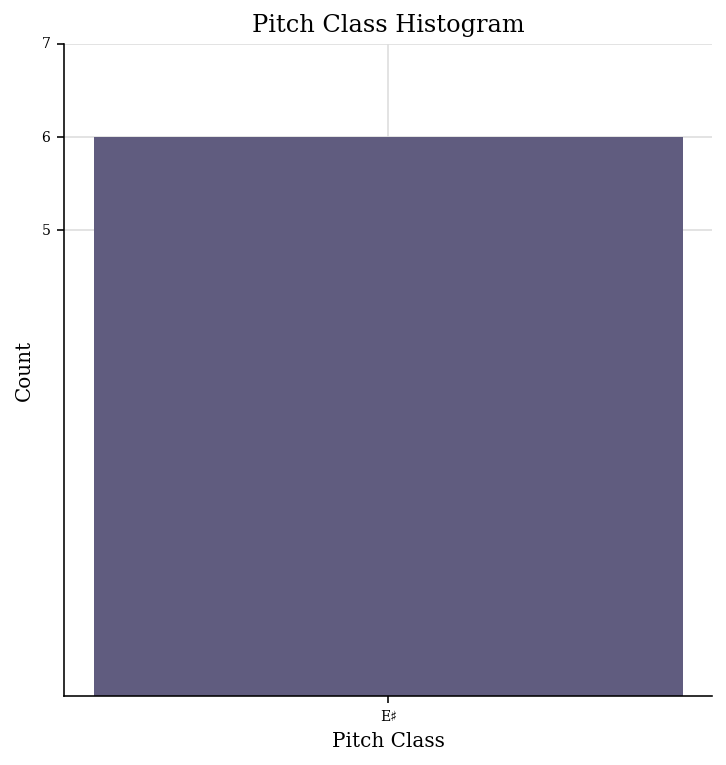

In [30]:
esharpStream.plot('pitchclass')

But maybe this one could tell someone something:

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score 0x7fe516823a30>>

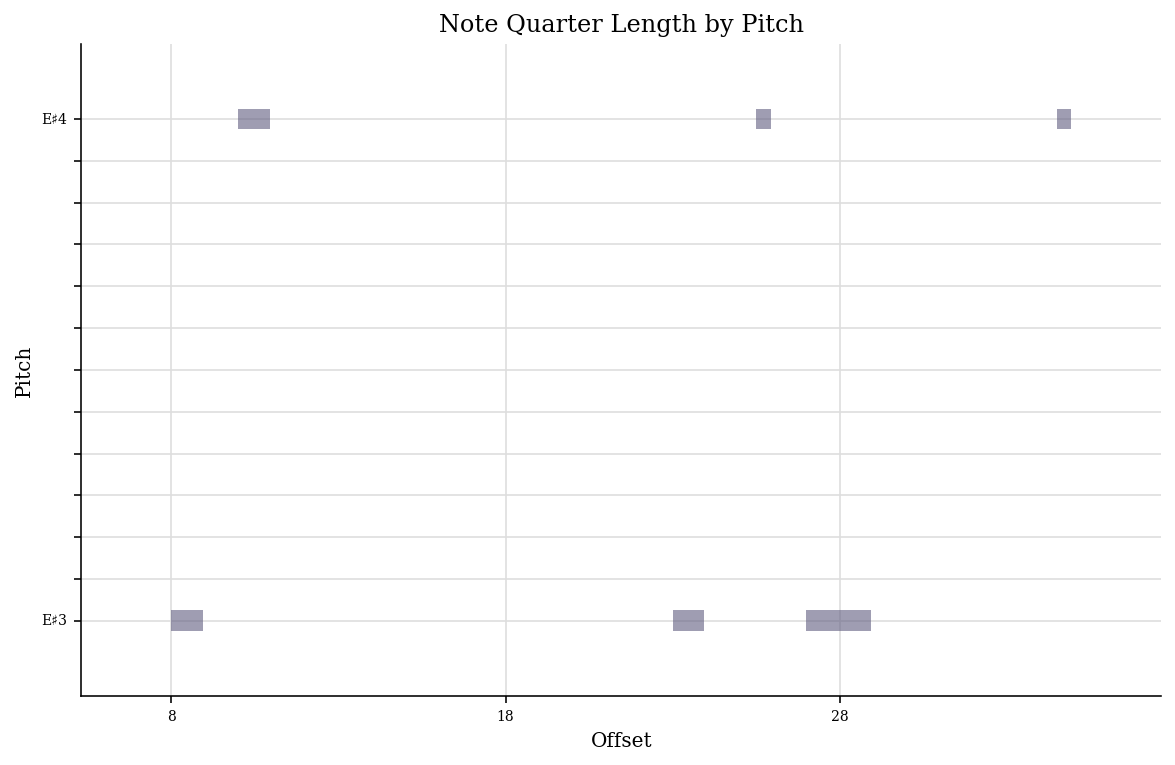

In [31]:
esharpStream.plot('pianoroll')

Perhaps not.  But iterators are not the main point -- what you can do with them is more important, so we will return to working with actual musical objects in :ref:`Chapter 27 <usersGuide_27_graceNotes>` when we talk about Grace Notes.